In [1]:
import requests

In [2]:
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from PIL import Image
from io import BytesIO

In [3]:
subscription_key = "925c45bc12f1471791d9a53262965e4e"
assert subscription_key

In [4]:
vision_base_url = "https://japaneast.api.cognitive.microsoft.com/vision/v2.0/"

In [5]:
ocr_url = vision_base_url + "ocr"

In [6]:
image_url = "https://upload.wikimedia.org/wikipedia/commons/thumb/a/af/" + \
    "Atomist_quote_from_Democritus.png/338px-Atomist_quote_from_Democritus.png"

In [7]:
headers = {'Ocp-Apim-Subscription-Key': subscription_key}
params  = {'language': 'unk', 'detectOrientation': 'true'}
data    = {'url': image_url}
response = requests.post(ocr_url, headers=headers, params=params, json=data)
response.raise_for_status()

analysis = response.json()

HTTPError: 401 Client Error: Access Denied for url: https://japaneast.api.cognitive.microsoft.com/vision/v2.0/ocr?language=unk&detectOrientation=true

In [ ]:
line_infos = [region["lines"] for region in analysis["regions"]]
word_infos = []
for line in line_infos:
    for word_metadata in line:
        for word_info in word_metadata["words"]:
            word_infos.append(word_info)
word_infos

NameError: name 'word_infos' is not defined

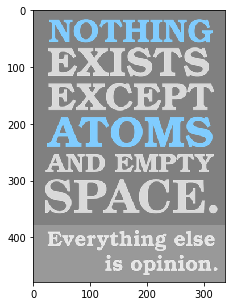

In [8]:
plt.figure(figsize=(5, 5))
image = Image.open(BytesIO(requests.get(image_url).content))
ax = plt.imshow(image, alpha=0.5)
for word in word_infos:
    bbox = [int(num) for num in word["boundingBox"].split(",")]
    text = word["text"]
    origin = (bbox[0], bbox[1])
    patch  = Rectangle(origin, bbox[2], bbox[3], fill=False, linewidth=2, color='y')
    ax.axes.add_patch(patch)
    plt.text(origin[0], origin[1], text, fontsize=20, weight="bold", va="top")
plt.axis("off")